# Chapter04 模型选择与评估

## 4.3 模型验证方法（Model Validation）

- 通过交叉验证计算得分
```
model_selection.cross_val_score(estimator, X)
```
- 对每个输入数据点产生交叉验证估计
```
model_selection.cross_val_predict(estimator, X)
```
- 计算并绘制模型的学习率曲线
```
model_selection.learning_curve(estimator, X, y)
```
- 计算并绘制模型的验证曲线
```
model_selection.validation_curve(estimator, ...)
```
- 通过排序评估交叉验证得分的重要性
```
model_selection.permutation_test_score(...)
```

参数列表长度 10


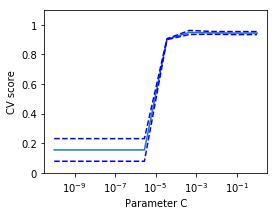

In [9]:
# cross_val_score

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn import svm

digits = load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel = 'linear')
C_s = np.logspace(-10, 0, 10)
print('参数列表长度', len(C_s))


scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))    
scores

# 绘制交叉验证曲线
import matplotlib.pyplot as plt
plt.figure(1, figsize = (4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x:"%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()


In [11]:
# cross_val_predict

from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_predict

diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
y_predict = cross_val_predict(lasso, X, y)


In [15]:
# learning curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  # 高斯朴素贝叶斯
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# 定义一个绘图函数
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, 
                        n_jobs = 1, train_size = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, 
                                                           n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, 
                     alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean - test_scores_std, 
                     alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'train_score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'cross_validation_score')
    plt.legend(loc = 'best')
    
    return plt

digits = load_digits()
X, y = digits.data, digits.target
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

title = 'Learning Curve (Naive Bayes)'
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim = (0.7, 1.01), cv = cv)
    

plt.show()





UnboundLocalError: local variable 'train_sizes' referenced before assignment